# Lehreinheit 5 – Aufgabe 3 (begleitendes Material)
Autoren: Nicolás Franco Gómez, Frederik Rentzsch. Bei Fragen, Anmerkungen und/oder Korrekturhinweisen bitte eine Mail an <nicolasfrancogomez@yahoo.com> oder <f.rentzsch@tu-berlin.de> schreiben.

In diesem Jupyter Notebook wollen wir den Rayleigh-Quotienten für die gegebene Ansatzfunktion $w(x,t) = C x^2(l-x)^2 q(t)$ mithilfe der Python-Bibliothek `SymPy` zur Manipulation symbolischer Ausdrücke berechnen.

Aus Vorlesung, Übung und Tutorium wissen wir, dass der Rayleigh-Quotient eine obere Schranke $\tilde{\omega}_1$ für die erste Eigenkreisfreqenz $\omega_1$ liefert. Für einen Euler-Bernoulli-Balken lautet er (vgl. 5. Formelblatt): 

$$\omega_1 \leq \tilde{\omega}_1 = \sqrt{\frac{\int_0^l E I \tilde{W}''^2_1(x) \, \mathrm{d}x}{ \int_0^l \varrho A \tilde{W}^2_1(x) \, \mathrm{d}x}} \, .$$

$\tilde{W}_1$ ist eine Näherung für die erste Eigenform. Mit der gegebenen Ansatzfunktion folgt unmittelbar $\tilde{W}_1(x) = x^2(l-x)^2$.



*kleine Verständnisfrage: Inwiefern ändert sich das Ergebnis des Rayleigh-Quotienten, wenn wir stattdessen $\tilde{W}_1(x)=Cx^2(l-x)^2$ verwenden?*

<center><img src="system.png" alt="Drawing" style="width: 300px;" align="center"/></center>

In [1]:
# Importieren von Sympy
from sympy import *

# Definition der Symbole
x = Symbol('x') #Variable
E, I, d, A, l = Symbol('E'),Symbol('I'),Symbol(r'\varrho'),Symbol('A'),Symbol('l') # Konstanten.

In [2]:
print('Ansatzfunktion:')
w = x**2*(l-x)**2
w

Ansatzfunktion:


x**2*(l - x)**2

In [3]:
print('Zweite Ableitung der Ansatzfunktion:')
w_2 = diff(w,x,2)
w_2

Zweite Ableitung der Ansatzfunktion:


2*(x**2 - 4*x*(l - x) + (l - x)**2)

In [4]:
print('Näherung für erste Eigenkreisfrequenz')
w_tilde = sqrt(integrate(w_2**2,(x,l,0))*E*I/(integrate(w**2,(x,l,0))*d*A))
w_tilde.evalf(5)

Näherung für erste Eigenkreisfrequenz


22.45*(E*I/(A*\varrho*l**4))**0.5

## Vergleich mit der "exakten" Lösung
Die "exakte" Lösung ist gegeben durch
$$\omega_1 = 15,42 \,\frac{1}{l^2}\sqrt{\frac{EI}{\varrho A}}\,.$$

Die geschätzte Lösung lautet
$$\hat{\omega}_1 \approx 22,45 \, \frac{1}{l^2}\sqrt{\frac{EI}{\varrho A}}\,.$$

In [5]:
#Fehlerberechnung
print(f"Der relative Fehler beträgt {(22.45-15.42)/15.42*100:.2f}%.")

Der relative Fehler beträgt 45.59%.


Wir sehen, dass der relative Fehler $\epsilon_{\text{rel}} \approx 45,6 \% $ beträgt. Somit liefert die gegebene Ansatzfunktion kein zufriedenstellendes Ergebnis. Im Tutorium wurde bereits diskutiert aus welchen Gründen das Ergebnis so stark vom korrekten Wert abweicht.

# Zusatz für Interessierte
- Im weiteren Verlauf werden wir ein Verfahren kennenlernen, das es uns ermöglicht die, in der Aufgabenstellung gegebene, "exakte" erste Eigenkreisfrequenz zu erhalten. Dabei wird die zugrundeliegende, nichtlineare Frequenzgleichung numerisch gelöst.

- Zum Abschluss werden verschiedene Ansatzfunktionen präsentiert und graphisch nebeneinander dargestellt.

## Numerische Lösung mittels Bisektionsverfahren

Aus der 3. Lehreinheit ist bekannt, dass

$$ 
\mathrm{FG:} \quad \tan(z) = \tanh(z), \quad z := \lambda l, \quad \lambda^4 = \frac{\omega^2 \varrho A}{EI}
$$

die Frequenzgleichung (FG) des gegebenen Systems ist (s. Übungsblatt 3, Aufgabe 1, Gl. 21). Gesucht sind also die Schnittpunkte der Tangens- mit der Tangens Hyperbolicusfunktion. Diese nichtlineare Gleichung lässt sich nicht auf elementare Weise lösen. Wir verwenden das [Bisketionsverfahren](https://de.wikipedia.org/wiki/Bisektion), das zur numerischen Lösung von Gleichungen des Typs $f(z)=0$ verwendet werden kann. Wir definieren hierfür

$$
f(z) := \tan(z) - \tanh(z) = 0.
$$

Die Idee des Verfahrens ist simpel. Wir nehmen der Einfachheit halber an, dass wir ein Intervall $[l, r]$ haben auf dem $f$ streng monoton wächst, wobei wir nach Möglichkeit schon wissen, dass sich in diesem Intervall (mindestens) eine Nullstelle befindet. Es muss also $f(l) < 0$ und $f(r) > 0$ gelten oder kompakter $f(l)f(r) < 0$. Haben wir solch ein Intervall (durch Ausprobieren) gefunden, wird der Mittelwert der Intervallgrenzen gebildet, $m = \frac{l+r}{2}$. Ist nun $f(l)f(m) < 0$, setzen wir $r=m$, andernfalls $l=m$ und berechnen den Mittelwert der neuen Intervallgrenzen usw. Das Intervall, in dem sich die Nullstelle befindet, wird auf diese Weise bei jedem Durchlauf halbiert und die Nullstelle kann beliebig genau ermittelt werden.


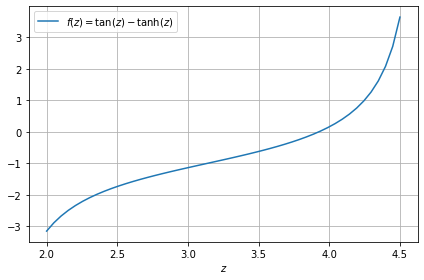

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(2,4.5)
plt.plot(z,np.tan(z)-np.tanh(z),label=r'$f(z)=\tan(z)-\tanh(z)$')
plt.grid(True)
plt.legend()
plt.xlabel(r'$z$')
plt.tight_layout()

Anhand des Graphen erkennen wir, dass $f$ im Intervall \[2, 4.5\] streng monoton wächst und eine Nullstelle in der Nähe von $z=4$ enthält. Unsere Voraussetzungen sind somit erfüllt und das Bisektionsverfahren darf angewandt werden.

In [7]:
def bisektionsverfahren(f,left,right,eps=1e-4):
  """Berechnung einer Nullstelle im Intervall [left, right] der streng monoton steigenden Funktion f 
  mittels Bisektionsverfahren
  f: function handle
  left: linke Intervallgrenze
  right: rechte Intervallgrenze
  eps: geforderte Maximallänge des Intervalls in dem sich die Nullstelle befindet"""

  if f(left)*f(right) >= 0:
    raise Exception("Voraussetzung f(l)f(r)<0 nicht erfüllt. Probiere ein anderes Intervall.")

  n = 0
  while right-left > eps:
    n+=1
    m = (left+right)/2
    if f(left)*f(m) < 0:
      right = m
    else:
      left = m
  print(f'Iterationen: {n}')
  return (left+right)/2

stellen = 4 # Anzahl korrekt wiedergegebener Nachkommastellen
f = lambda z: np.tan(z)-np.tanh(z)
eps = 10.**(-stellen)
left, right = 2, 4.5

nullst = bisektionsverfahren(f,left,right,eps)

print(f"""Erste (positive) Nullstelle der Frequenzgleichung f(z) = 0 
wurde auf {stellen} Nachkommastellen genau bestimmt und liegt bei z = {nullst:.{stellen}f}.""")

Iterationen: 15
Erste (positive) Nullstelle der Frequenzgleichung f(z) = 0 
wurde auf 4 Nachkommastellen genau bestimmt und liegt bei z = 3.9266.


Das Programm liefert den Näherungswert $z \approx 3,9266$. Daraus erhalten wir die erste Eigenkreisfrequenz zu

$$ \omega_1 = \frac{z^2}{l^2} \sqrt{\frac{EI}{\varrho A}} \approx 15,42 \,\frac{1}{l^2} \sqrt{\frac{EI}{\varrho A}}\, ,$$

was mit dem gegebenen Wert übereinstimmt.

## Eigenform $W_1(x)$
Passt man die allgemeine Lösung der Eigenform(en)

$$
W(x) = \tilde{A} \cos(\lambda x) + \tilde{B} \sin(\lambda x) + \tilde{C} \cosh(\lambda x) + \tilde{D} \sinh(\lambda x)
$$

an die Randbedingungen an und behält $\tilde{A}$ als freien Parameter (<i>Beachte:</i> $\tilde{A} \neq A$. $A$ ist die Querschnittsfläche!), so resultiert

$$
W(x) = \tilde{A} \left[ \cos(\lambda x) - \cot(\lambda l) \sin(\lambda x) - \cosh(\lambda x) + \coth(\lambda l) \sinh(\lambda x) \right] \, .
$$

<i><b>Hinweis:</b></i> *Die oben angegebene Eigenform ist nur eine Darstellung von vielen. Da wir 5 Parameter haben $\tilde{A},\tilde{B},\tilde{C},\tilde{D},\lambda$ aber nur 4 Gleichungen aus den Randbedingungen, muss zwingend ein Parameter (hier $\tilde{A}$) frei bleiben. Diese recht kompakte Form erhalten wir, indem wir die Randbedingungen $W(0)=0, W(l)=0, W''(l)=0$ verwenden. Die letzte Randbedingung $W'(0)=0$ wird automatisch durch (FG) erfüllt. (Es ist eine gute Übung dies nachzuempfinden.)*



Für die graphische Darstellung verwenden wir die normierte Ortskoordinate $\hat{x} = \frac{x}{l} $. Die Amplitude wird ebenfalls normiert dargestellt, d.h. $\hat{W}(x)=\frac{W(x)}{\max |W(x)|}$.

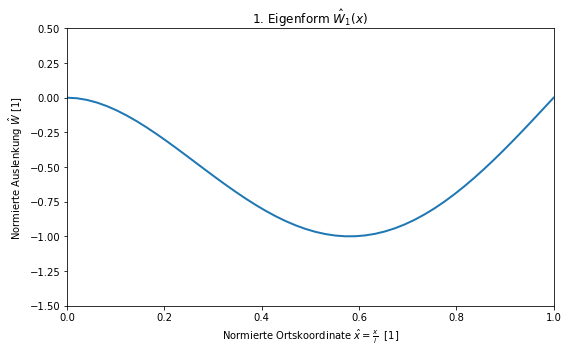

In [8]:
cot = lambda x: 1/np.tan(x)
coth = lambda x: 1/np.tanh(x)
def eigform1(x):
  return np.cos(nullst*x) - cot(nullst)*np.sin(nullst*x)-np.cosh(nullst*x)+coth(nullst)*np.sinh(nullst*x) 

x = np.linspace(0,1)
fig = plt.figure(figsize=(8,5))
ax = plt.axes(xlim=(0, 1), ylim=(-1.5, .5))
ax.plot(x, eigform1(x)/np.max(np.abs(eigform1(x))),linewidth=2)
ax.set_title(r'1. Eigenform $\hat{W}_1(x)$')
ax.set_xlabel(r'Normierte Ortskoordinate $\hat{x} = \frac{x}{l}$  [1]')
ax.set_ylabel(r'Normierte Auslenkung $\hat{W}$ [1]')
fig.tight_layout()

### Animation der Eigenform $W_1(x)$
<i>Beachte:</i> Die hier gezeigte Frequenz $f_1 = \frac{\omega_1}{2 \pi}$ ist willkürlich zur Demonstration gewählt und entspricht nicht der echten Frequenz, mit der das System schwingt.
<center><img src="animation.gif" alt="Drawing" style="width: 680px;" align="center"/></center>

## Weitere Ansatzfunktionen
Letztlich werden weitere Ansatzfunktionen ausprobiert und die Ergebnisse miteinander verglichen.

In [9]:
x = Symbol('x')
#######

w = x**2*(l-x)**2 # <- Hier können Sie Ihre ganz eigene Ansatzfunktion ausprobieren!

#w = x**2 - (5/3/l)*x**3 + (2/3/l**2)*x**4 # Musterlösung der besseren Ansatzfunktion, wie kommt man auf diese?

#######
w_2 = diff(w,x,2)
ergebnis = sqrt(integrate(w_2**2,(x,l,0))*E*I/(integrate(w**2,(x,l,0))*d*A))
ergebnis.evalf(5)



22.45*(E*I/(A*\varrho*l**4))**0.5

*Verständnisfrage: Warum sollte mindestens ein Ansatz 4. Ordnung für $\tilde{W}_1$ verwendet werden?*

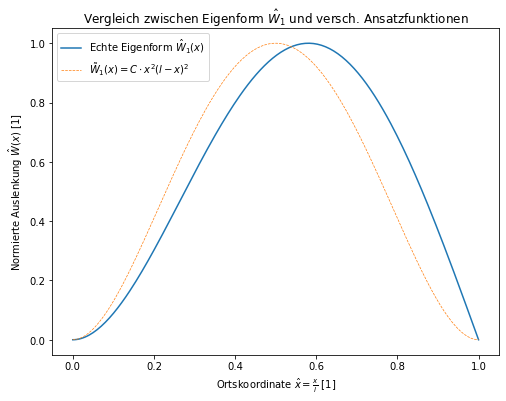

In [11]:
x_norm = np.linspace(0,1,200)

ansatz = []
ansatz.append((x_norm-1)**2*x_norm**2)

plt.figure(figsize=(8,6))
plt.title(r'Vergleich zwischen Eigenform $\hat{W}_1$ und versch. Ansatzfunktionen')
plt.plot(x_norm,-eigform1(x_norm)/np.max(np.abs(eigform1(x_norm))),label=r'Echte Eigenform $\hat{W}_1(x)$')
plt.xlabel(r'Ortskoordinate $\hat{x} = \frac{x}{l}$ [1]')
plt.ylabel(r'Normierte Auslenkung $\hat{W}(x)$ [1]')
plt.plot(x_norm,ansatz[0]/np.max(np.abs(ansatz[0])),label=r"$\tilde{W}_1(x) = C \cdot x^2(l-x)^2$",linestyle='--',linewidth=0.7)
plt.legend()
plt.show()

# Ideen zum Experimentieren mit dem Notebook

- (Weitere Eigenformen plotten) Oben haben wir die 1. Eigenform dargestellt. Man kann mit einer kleinen Änderung im Programmcode auch eine beliebige andere Eigenform finden. Versuchen Sie den Code so anzupassen, dass Sie z.B. die 2. Eigenform erhalten. <i>Hinweis:</i> Man benötigt einen anderen Wert für $z$.

- (Bessere Ansatzfunktion finden) Die hier verwendeten Ansatzfunktionen liefern allesamt viel zu große Wert für $\tilde{\omega}_1$. Eine einfache Möglichkeit eine oft ausreichend genaue Ansatzfunktion zu erhalten besteht darin eine gewisse Form für $\tilde{W}_1$ anzunehmen und die darin vorkommenden freien Parameter so anzupassen, dass $\tilde{W}_1$ die Randbedingungen erfüllt. Hier könnte ein solcher Ansatz lauten $\tilde{W}_{\mathrm{ab}}(x)=x^2+ax^3+bx^4$.
Finden Sie die Parameter $a$ und $b$. (Es ist Ihnen überlassen ob Sie hierfür `SymPy`
 verwenden oder von Hand rechnen). Berechnen Sie danach $\tilde{\omega}_\mathrm{ab}$, indem Sie den Programmcode entsprechend anpassen. Die mit dieser Ansatzfunktion gefundene Näherung $\tilde{\omega}_1$ sollte nur um etwa $0,2 \%$ größer sein als $\omega_1$. Überprüfen Sie diese Aussage.

- (Numerische Verfahren) Das Bisektionsverfahren ist das einfachste numerische Verfahren zur Lösung des Nullstellenproblems. Nutzen Sie ihre favorisierte Suchmaschine und finden Sie mindestens ein weiteres Verfahren, welches das Nullstellenproblem (numerisch) löst und implementieren Sie es. Alternativ können Sie eigene Überlegungen zur Verbesserung des Bisektionsverfahrens anstellen und diese implementieren. Testen Sie ihren Programmcode mit unserem $f$. Stimmt Ihre Lösung für $\omega_1$ mit der auf dem Aufgabenblatt angegebenen überein?



Viel Spaß!

# Dependencies

In [15]:
! pip install watermark 

%load_ext watermark

# python, ipython, packages and machine characteristics
%watermark -v -m -p numpy,sympy,matplotlib

print(" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
sympy     : 1.8
matplotlib: 3.3.4

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Jun 17 2021 16:00:01Mitteleuropäische Sommerzeit

